# Binary classification of canopy snow in time lapse images

SnowEx Hackweek 2021 

*#cam_learning*

__Contributors:__ Evi Ofekeze, Ibrahim Olalekan Alabi, Todd Mitchell, Jukes Liu, Mark Raleigh


In [21]:
# !aws s3 sync --no-progress s3://snowex-data/tutorial-data/camera-trap/W9A/ /tmp/camera-trap/W9A/

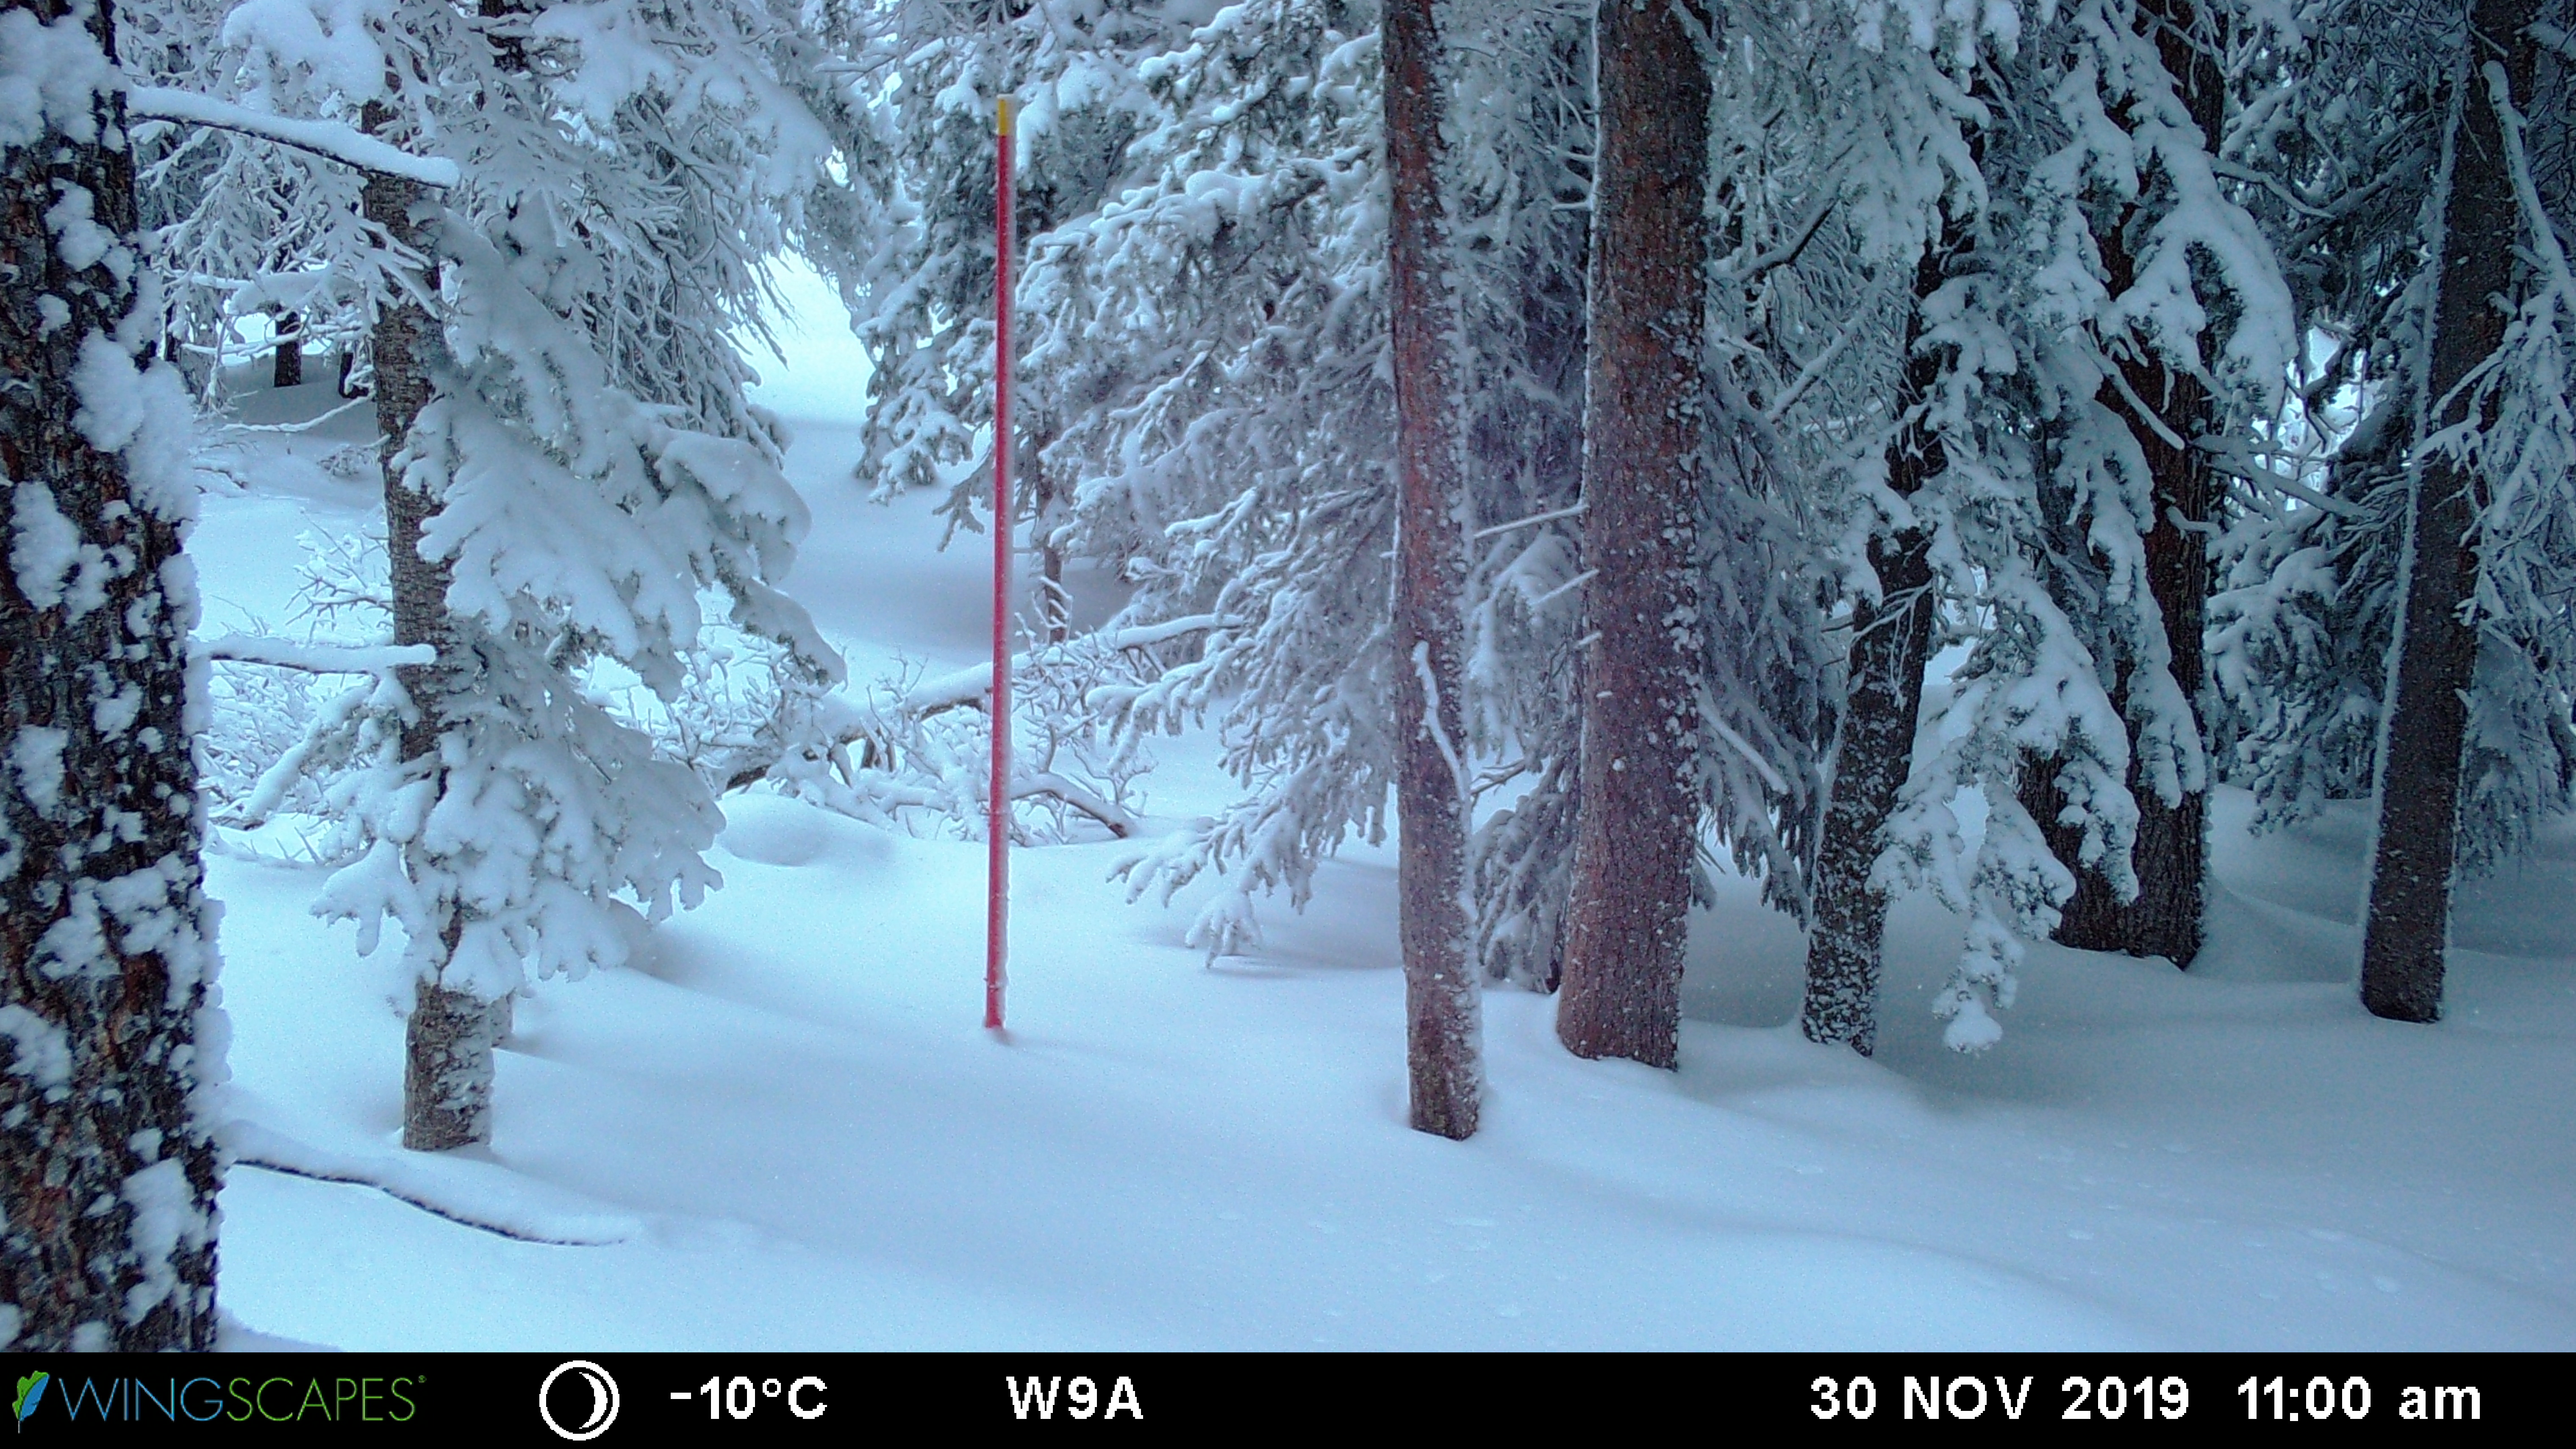

In [22]:
from IPython.display import Image, display

example_img = Image(filename='/tmp/camera-trap/W9A/WSCT0137.JPG',  width=800)
display(example_img)

### Goals: 
- Train 2 machine learning models for classifying snow in the canopy
- Quantify error associated with canopy snow-on, snow-off prediction
- Compare the 2 models (1 simple and 1 complex)
- Have fun working with the SnowEx camera data!

### Motivations:
- Snow in the canopy influences remote sensing data (e.g. pixel reflectance in optical satellite images, radar backscatter signal)
- Canopy interception of snow is simulated in certain snow models, so classified images can provid validation on timing and duration of snow in the canopy

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob as gb

## 0) Visualize the camera data

In [17]:
# !pip install folium

In [16]:
import folium 

# map the site location
m = folium.Map(location=[39.035, -108.0612], tiles="Stamen Terrain", zoom_start=8, width='70%', height='70%', control_scale=True)
folium.Marker([39.097329,-107.887477], popup='E9A', icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.100639,-107.900614], popup="E9B", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.098962,-107.893702], popup="E9C", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.074028,-107.877689], popup="E9D", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.059881,-107.876662], popup="E9E", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.047323,-107.923406], popup="E9F", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.03827,-107.935097],  popup="E9G", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.050599,-108.051624], popup="W8A", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.012393,-108.17615],  popup="W9B", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.024416,-108.171069], popup="W9C", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.012585,-108.095973], popup="W8C", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.024416,-108.171069], popup="W9C", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.036476,-108.155686], popup="W9D", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.033751,-108.160689], popup="W9E", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.031366,-108.180167], popup="W9G", icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([39.036208,-108.161851], popup="W9A", icon=folium.Icon(color='orange')).add_to(m)
m

### W9A camera view:

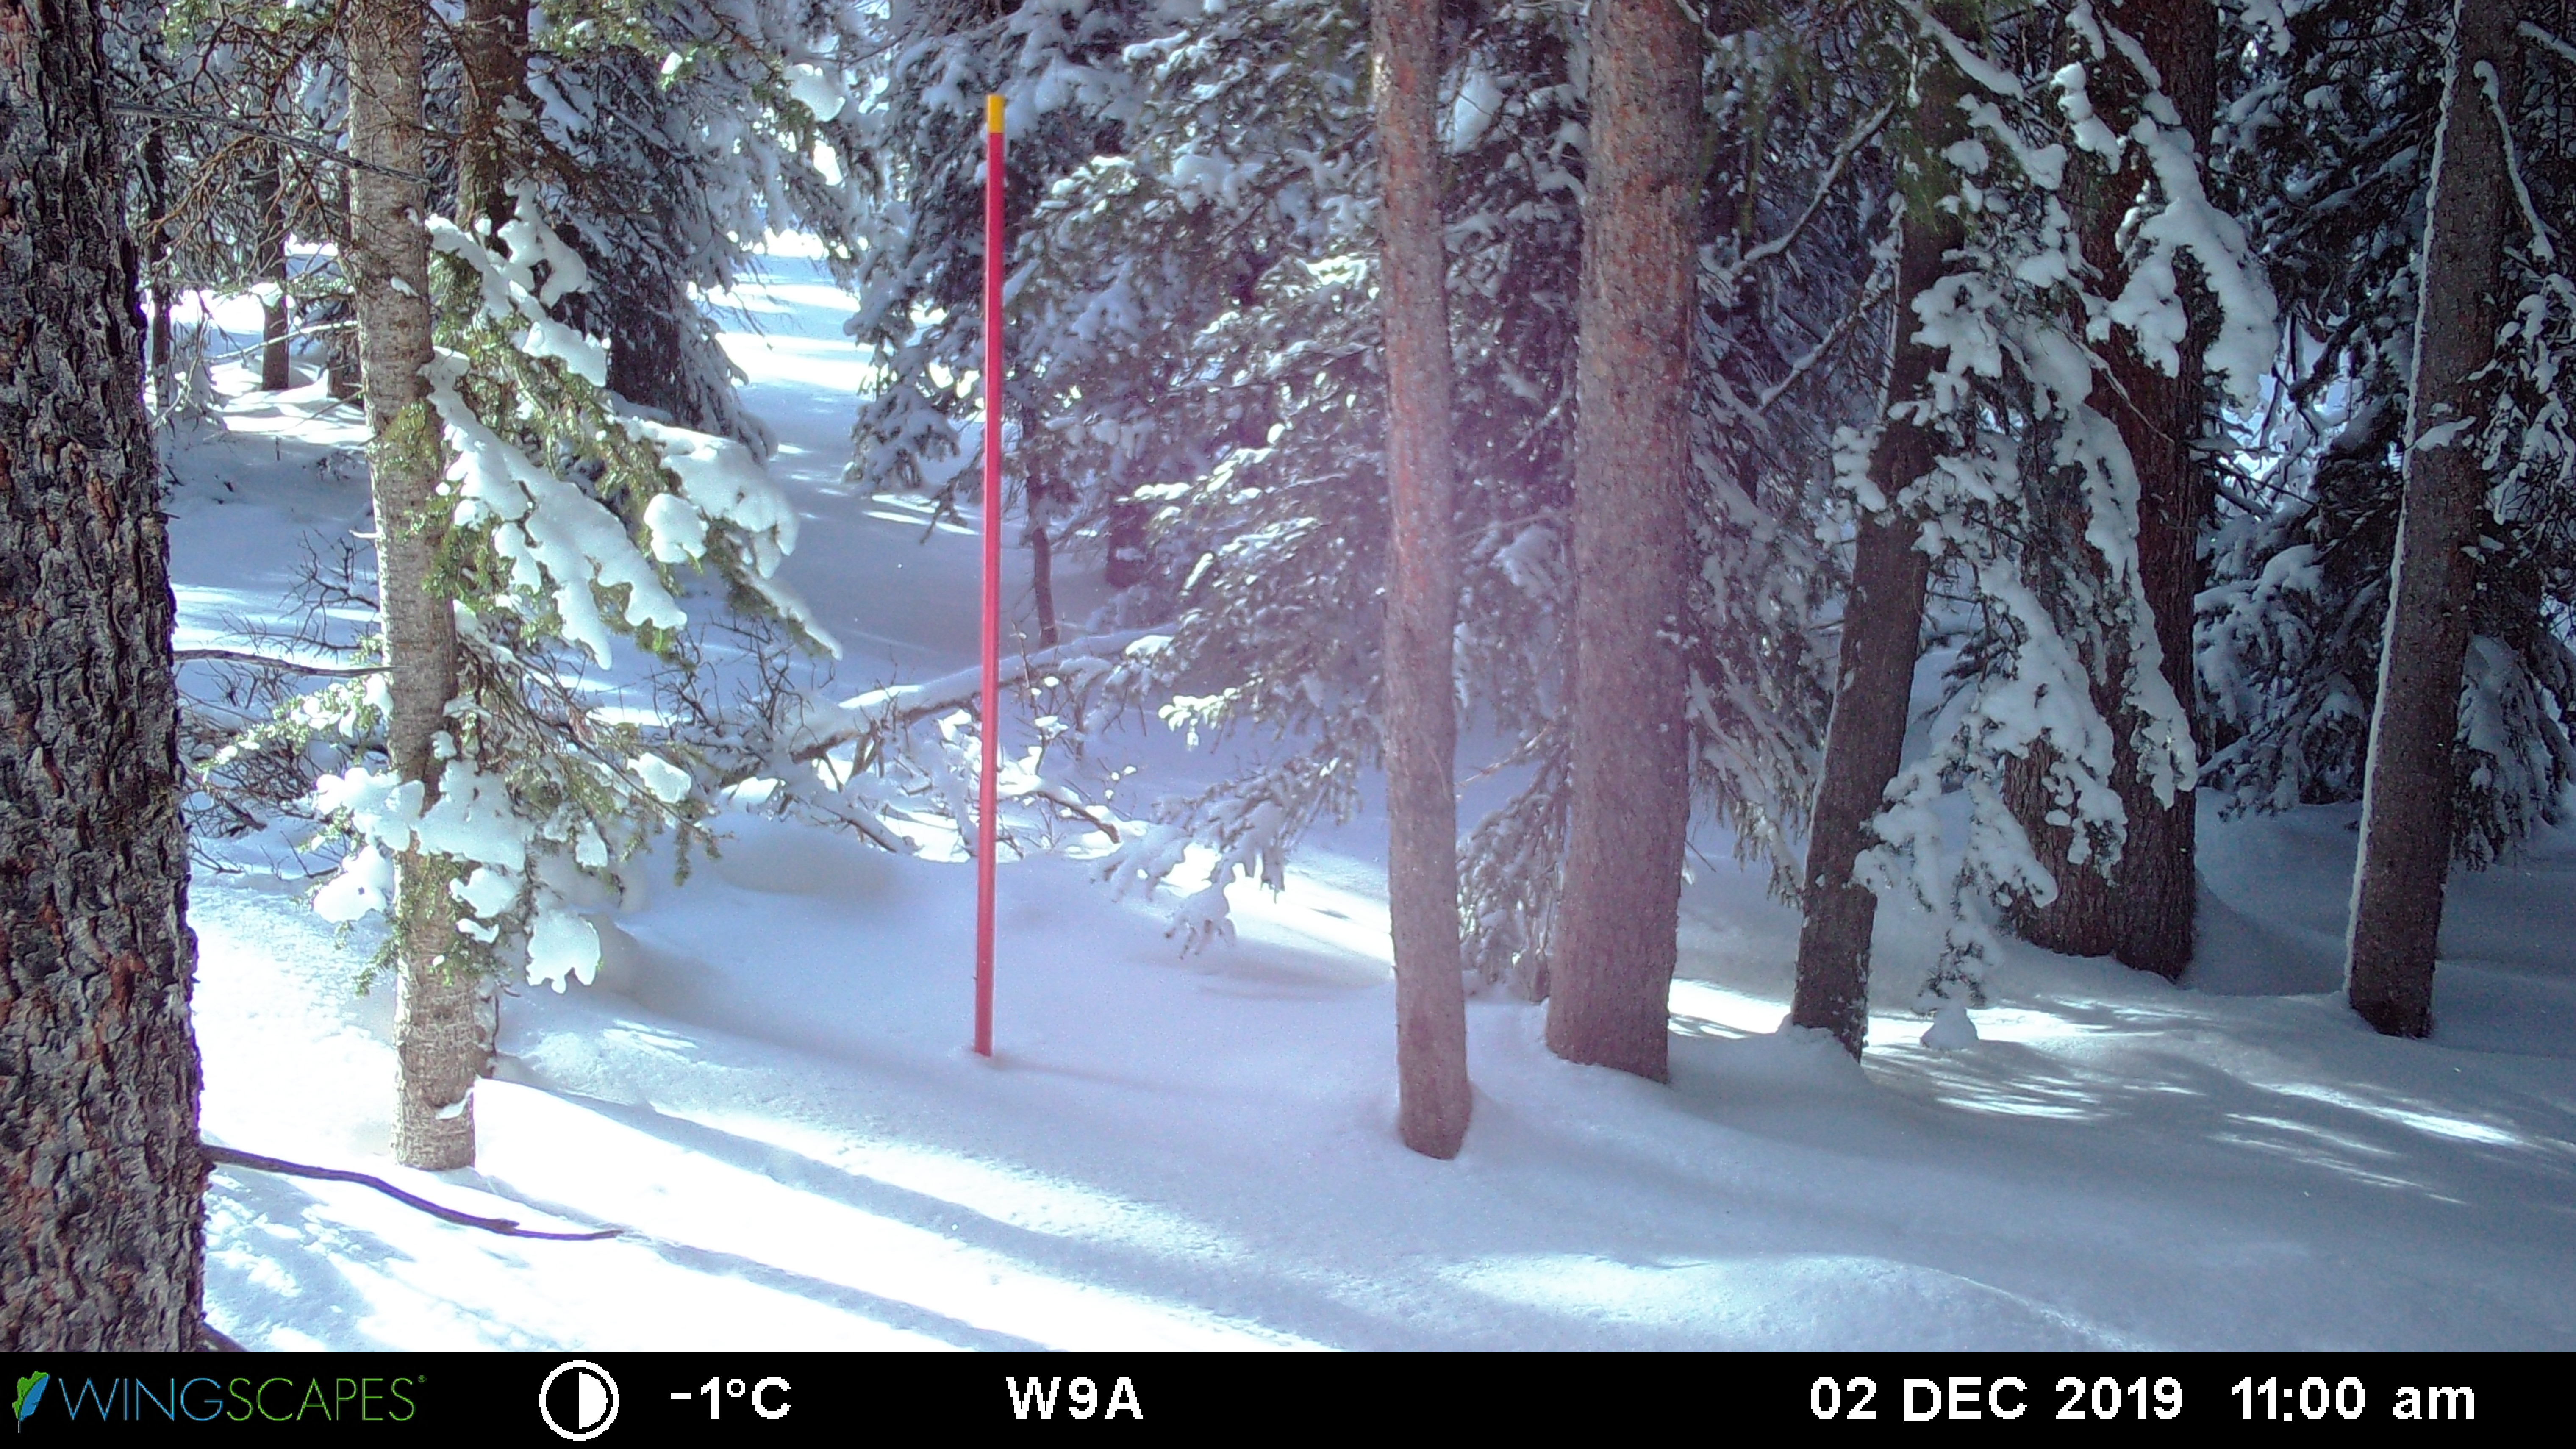

In [26]:
example_img = Image(filename='/tmp/camera-trap/W9A/WSCT0141.JPG',  width=800)
display(example_img)

## 1) Labeling/Annotation: manually classify the images as canopy snow-on or snow-off to provide input data for the models

- Focused only on snow in the upright trees
- 2 images were taken per day at 11am and noon from September 25, 2019 to August 17, 2020
- We divided 656 images amongst the team members to make the labeling more efficient *#teamwork*

In [34]:
from pigeon import annotate

In [21]:
# !pip install pigeon-jupyter

In [35]:
# loop through images and copy into a list
img_temp = []
for i in range(5,661):
    temp = '/tmp/camera-trap/W9A/WSCT' + str(i).zfill(4) + '.JPG'
    img_temp.append(temp)

In [39]:
# divide amongst team members
# Jukes only
annotations_j = annotate(
    img_temp[0:132], # subset
    options = ['snow-off', 'snow-on'],
    display_fn = lambda filename: display(Image(filename,width=800, height=600))
)

HTML(value='0 examples annotated, 133 examples left')

Output()

In [37]:
# # save the data
# annotations_j = np.array(annotations_j) # converts list to numpy array
# df = pd.DataFrame(annotations_j, columns= ['Image','Class']) # converts array to data frame
# df.to_csv('annotations_j.csv', index =False) # saves as csv in current working directory

## 2) Combine all labels and split into testing and training datasets

## 3) Pre-process image data for entry into the models

## 4) Build the machine learning models

Why did we choose the models that we did?

### 4A) Simple: Random Forest Classifier

some description...

### 4B) Complex

## 5) Prediction and errors

### 5A) Simple

### 5B) Complex

## Future directions:

- train model on images from other vegetated sites

...

*Parts of this code are based on the SnowEx Hackweek 2021 camera data tutorial by Katie Breen and Cassie Lumbrazo.*